# Deskripsi Proyek

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

## Langkah Pengerjaan Proyek

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.

## Deskripsi data

Data tersimpan di file `taxi.csv`(/datasets/taxi.csv). Jumlah pesanan di kolom'*num_orders*'.


## Persiapan

### Muat Data
Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [ ]:
# Import Library
import numpy as np
import pandas as pd


In [ ]:
# Ubah tipe data (parse_dates )
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [ ]:
# Menampilkan data
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [ ]:
# Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [ ]:
# Resampling dalam satu jam
data_resampled = data.resample('1H').sum()

In [ ]:
# Tampilkan data
print(data_resampled.head())

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


## Analisis

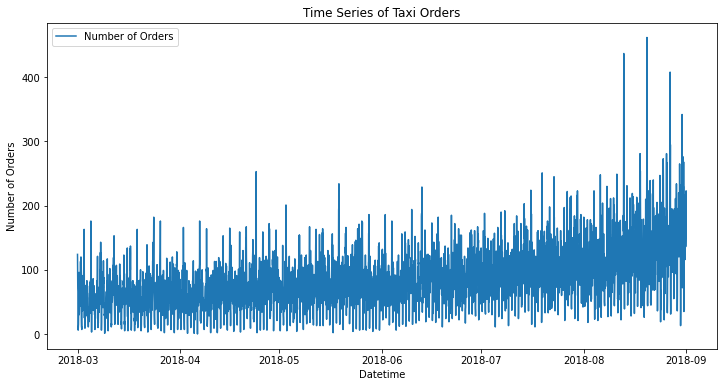

In [ ]:
# Visualisasi data menggunakan grafik time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_resampled.index, data_resampled['num_orders'], label='Number of Orders')
plt.title('Time Series of Taxi Orders')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

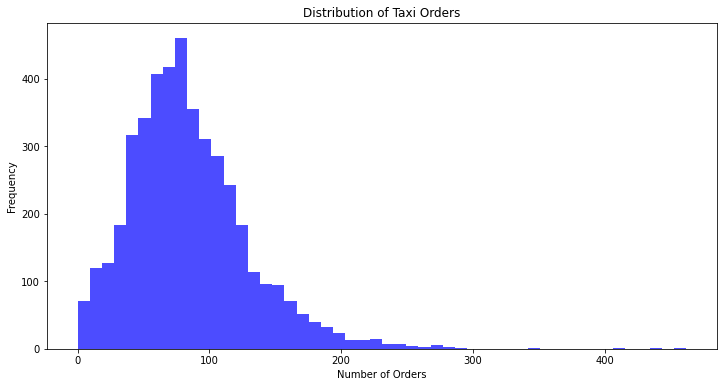

In [ ]:
# Visualisasi histogram untuk distribusi data
plt.figure(figsize=(12, 6))
plt.hist(data_resampled['num_orders'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Taxi Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analisis statistik deskriptif
desc_stats = data_resampled['num_orders'].describe()

In [ ]:
# Tampilkan statistik deskriptif
print("Statistik Deskriptif:")
print(desc_stats)

Statistik Deskriptif:
count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64


## Pelatihan

### Pembagian Data
Membagi data menjadi training set dan test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Pisahkan data menjadi set pelatihan dan set tes
train, test = train_test_split(data_resampled, shuffle=False, test_size=0.2)

# Feature Engineering
data_resampled['hour'] = data_resampled.index.hour
data_resampled['day_of_week'] = data_resampled.index.dayofweek

# Pisahkan data fitur (X) and target (y)
X = data_resampled.drop('num_orders', axis=1)
y = data_resampled['num_orders']

# Pisahkan data untuk training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# latih Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Latih model LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

## Pengujian

In [ ]:
# Predictions
rf_predictions = rf_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test)

# Evaluasi model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))

# Tampilkan hasil RMSE
print(f"Random Forest RMSE: {rf_rmse}")
print(f"LightGBM RMSE: {lgb_rmse}")

Random Forest RMSE: 34.73713530652767
LightGBM RMSE: 34.67316645349674


## Kesimpulan
- Batas RMSE untuk model Random Forest dan LightGBM tidak lebih dari batas yang ditentukan yaitu 48.
- Score RMSE LightGBM lebih rendah sedikit dibanding Random Forest
- Kesimpulan yang dapat diambil adalah model LightGBM dapat digunakan untuk membantu mengoptimalkan penempatan pengemudi taksi pada jam-jam sibuk di bandara, sehingga bisa mengoptimalkan pemesanan taksi.